# What Makes People In A Country Happy?
Sung Mo Yang\
SBUID: 112801117

# Imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Loading and Cleaning Data

In [ ]:
# Constants paths to files
path_2015 = '2015.csv'
path_2016 = '2016.csv'
path_2017 = '2017.csv'
path_2018 = '2018.csv'
path_2019 = '2019.csv'


In [ ]:
# loading function
def load_dataset(path):
  dataset = pd.read_csv(path)
  return dataset

In [ ]:
# reading files
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2015 = pd.read_csv('2015.csv')
df_2019 = pd.read_csv('2019.csv')

In [ ]:
# Add a 'Year' column to each DataFrame
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019



In [ ]:
# Datasets were cleaned to fix major errors.
# Any NaN values were replaced with the mean mean of the column to keep the data consistent.
# Only one NaN value was found and corrected: the value for Perceptions of corruption for the United Arab Emirates
# The second error was inconsistent column names. The datasets had the same features under different names.
# The naming scheme from 2015's dataset was used as the standard and others were changed.
# Any columns holding statistical inforation such as standard error or whiskers were not considered as features.
# "Dysoptia Residual" was not a measure found in 2017 and 2018 datasets and was therefore not considered as a feature.

mean = df_2018['Perceptions of corruption'].mean()
df_2018['Perceptions of corruption'] = df_2018['Perceptions of corruption'].replace(np.nan, mean)

df_2015 = df_2015.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis=1)

df_2016 = df_2016.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1)

df_2017 = df_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1)
df_2017 = df_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 
                                  'Happiness.Score': 'Happiness Score', 
                                  'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 
                                  'Health..Life.Expectancy.': 'Health (Life Expectancy)', 
                                  'Trust..Government.Corruption.': 'Trust (Government Corruption)', 
                                  'Social Support': 'Family'})

df_2018 = df_2018.rename(columns={'Overall rank': 'Happiness Rank', 
                                  'Country or region': 'Country',
                                  'Score': 'Happiness Score',
                                  'GDP per capita': 'Economy (GDP per Capita)',
                                  'Freedom to make life choices': 'Freedom',
                                  'Healthy life expectancy': 'Health (Life Expectancy)', 
                                  'Perceptions of corruption': 'Trust (Government Corruption)', 
                                  'Social support': 'Family'})

df_2019 = df_2019.rename(columns={'Overall rank': 'Happiness Rank', 
                                  'Country or region': 'Country',
                                  'Score': 'Happiness Score',
                                  'GDP per capita': 'Economy (GDP per Capita)',
                                  'Freedom to make life choices': 'Freedom',
                                  'Healthy life expectancy': 'Health (Life Expectancy)', 
                                  'Perceptions of corruption': 'Trust (Government Corruption)', 
                                  'Social support': 'Family'})


In [ ]:
# concat data sets to generate training set (2015-2018) and test set (2019)
all_data = pd.concat([df_2015, df_2016, df_2017, df_2018], ignore_index=True)
all_data = all_data.drop(['Country'], axis=1)

df_2019 = df_2019.reindex(columns=['Country',
                                      'Happiness Rank',
                                        'Happiness Score',
                                        'Economy (GDP per Capita)',
                                        'Family',
                                        'Health (Life Expectancy)',
                                        'Freedom',
                                        'Trust (Government Corruption)',
                                        'Generosity',
                                        'Year'])

# df_2019 = df_2019.reindex(columns=['Country',
#                                       'Happiness Rank',
#                                         'Happiness Score',
#                                         'Economy (GDP per Capita)',
#                                         'Family',
#                                         'Health (Life Expectancy)',
#                                         'Freedom',
#                                         'Trust (Government Corruption)',
#                                         'Generosity'])

In [ ]:
# Get y_test labels
Y_2019_actual = df_2019['Happiness Score']

# Remove the 'Happiness Score' column from the features
X_2019 = df_2019.drop(['Happiness Score', 'Country', 'Happiness Rank'], axis=1)

# Exploratory Data Analysis

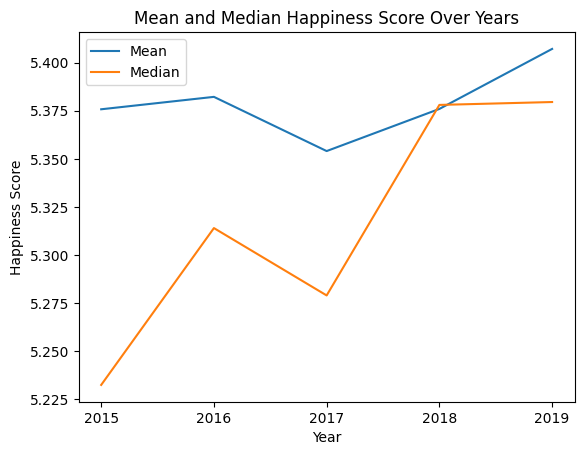

In [ ]:
# Line graph showing trends of mean and median happiness scores globally.
# As seen in the graph, central tendencies of global happiness as a metric have increased.

mean_2015 = df_2015['Happiness Score'].mean()
median_2015 = df_2015['Happiness Score'].median()

mean_2016 = df_2016['Happiness Score'].mean()
median_2016 = df_2016['Happiness Score'].median()

mean_2017 = df_2017['Happiness Score'].mean()
median_2017 = df_2017['Happiness Score'].median()

mean_2018 = df_2018['Happiness Score'].mean()
median_2018 = df_2018['Happiness Score'].median()

mean_2019 = df_2019['Happiness Score'].mean()
median_2019 = df_2019['Happiness Score'].median()

years = [2015, 2016, 2017, 2018, 2019]
mean_scores = [mean_2015, mean_2016, mean_2017, mean_2018, mean_2019]
median_scores = [median_2015, median_2016, median_2017, median_2018, median_2019]

plt.plot(years, mean_scores, label='Mean')
plt.plot(years, median_scores, label='Median')
plt.xlabel('Year')
plt.xticks(years, years)
plt.ylabel('Happiness Score')
plt.title('Mean and Median Happiness Score Over Years')
plt.legend()

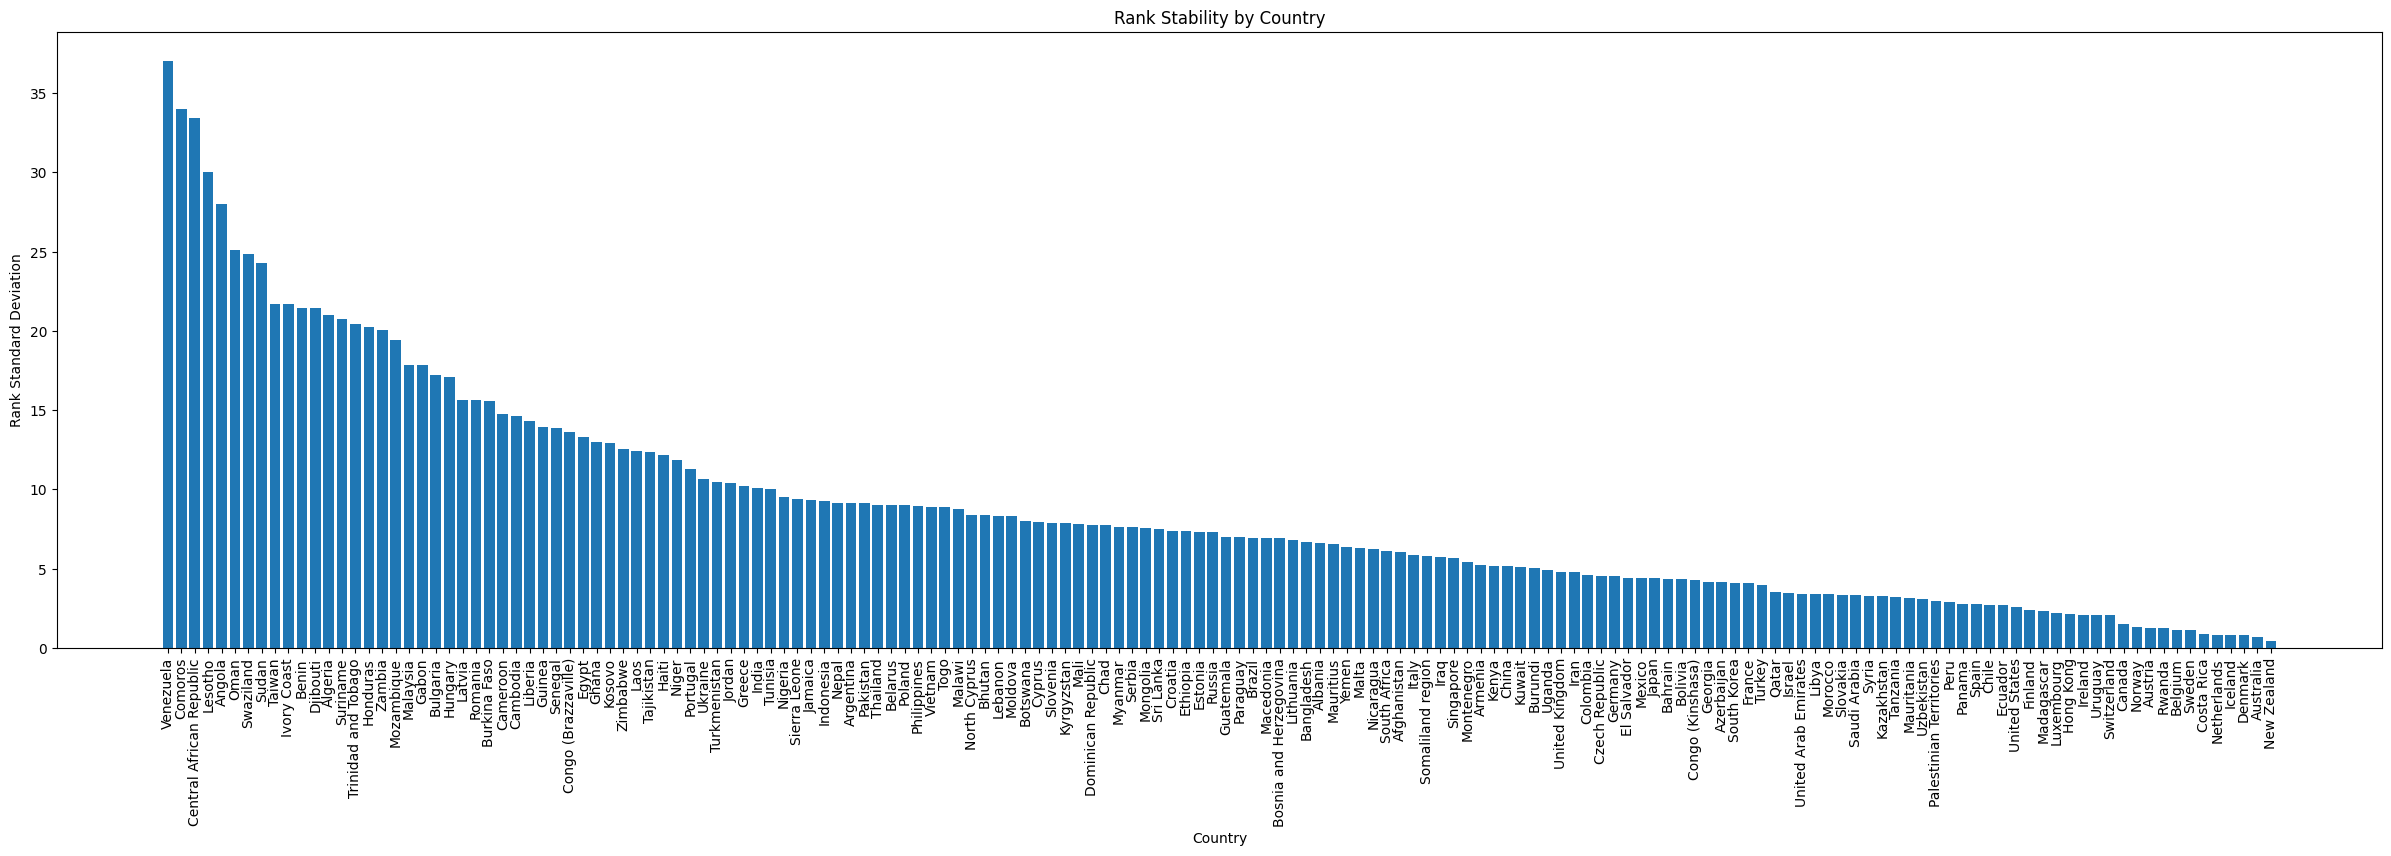

In [ ]:
# Ranking stability
# A measure of standard deviation of each State's happiness rank through the years 2015 to 2019.
# A higher bar means that State's happiness rank has varied greater than those with a smaller bar.

countries = df_2015['Country'].unique()
newdf = pd.DataFrame({'Country': countries})
df_dict = {2015: df_2015, 2016: df_2016, 2017: df_2017, 2018: df_2018, 2019: df_2019}

years = [2015, 2016, 2017, 2018, 2019]
for year in years:
    df_year = df_dict[year]
    rank_col = f"{year} Happiness Rank"
    rank_df = df_year[['Country', 'Happiness Rank']].rename(columns={'Happiness Rank': rank_col})
    newdf = newdf.merge(rank_df, on='Country', how='left')

newdf = newdf.fillna(newdf.mean(numeric_only=True))
newdf['Ranking Standard Deviation'] = newdf.iloc[:, 1:].std(axis=1)
newdf = newdf.sort_values(by='Ranking Standard Deviation', ascending=False)

plt.figure(figsize=(30, 8))
plt.bar(newdf['Country'], newdf['Ranking Standard Deviation'])
plt.xticks(rotation=90)
plt.title('Rank Stability by Country')
plt.xlabel('Country')
plt.ylabel('Rank Standard Deviation')
plt.show()

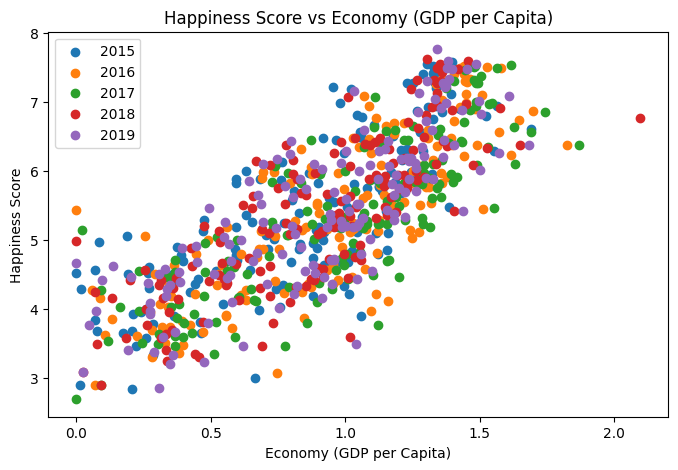

In [ ]:
# Visualization of happiness score and Economy (GDP per Capita)
# As observed, there is a positive linear relationship between the economy of a State
# and its constituent's happiness.

plt.figure(figsize=(8, 5))
plt.scatter(df_2015['Economy (GDP per Capita)'], df_2015['Happiness Score'], label='2015')
plt.scatter(df_2016['Economy (GDP per Capita)'], df_2016['Happiness Score'], label='2016')
plt.scatter(df_2017['Economy (GDP per Capita)'], df_2017['Happiness Score'], label='2017')
plt.scatter(df_2018['Economy (GDP per Capita)'], df_2018['Happiness Score'], label='2018')
plt.scatter(df_2019['Economy (GDP per Capita)'], df_2019['Happiness Score'], label='2019')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs Economy (GDP per Capita)')
plt.legend()
plt.show()

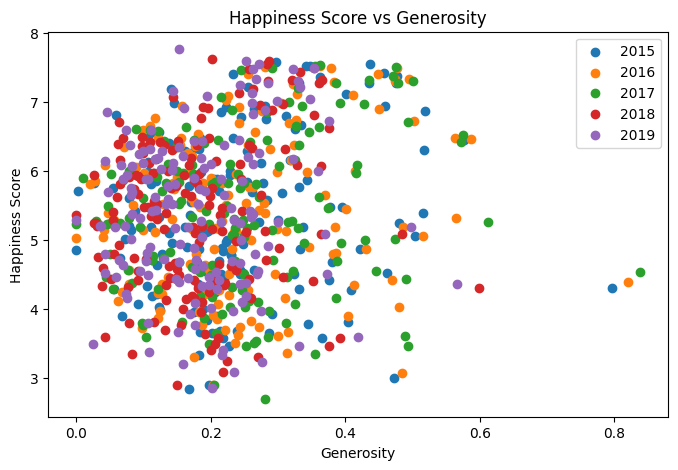

In [ ]:
# Visualization of happiness score and Generosity
# As observed by the circular shape, there is little relationship between
# generosity of the State and its happiness score.

plt.figure(figsize=(8, 5))
plt.scatter(df_2015['Generosity'], df_2015['Happiness Score'], label='2015')
plt.scatter(df_2016['Generosity'], df_2016['Happiness Score'], label='2016')
plt.scatter(df_2017['Generosity'], df_2017['Happiness Score'], label='2017')
plt.scatter(df_2018['Generosity'], df_2018['Happiness Score'], label='2018')
plt.scatter(df_2019['Generosity'], df_2019['Happiness Score'], label='2019')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs Generosity')
plt.legend()
plt.show()

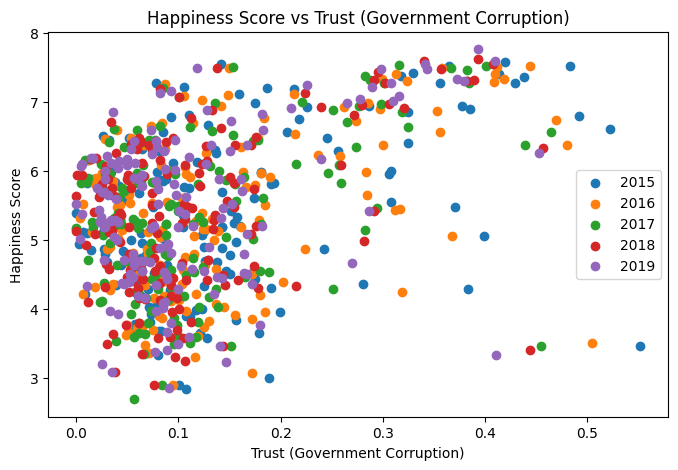

In [ ]:
# Visualization of happiness score and government corruption
# As observed by the clustering toward the left, happiness and government
# corruption have little relation.

plt.figure(figsize=(8, 5))
plt.scatter(df_2015['Trust (Government Corruption)'], df_2015['Happiness Score'], label='2015')
plt.scatter(df_2016['Trust (Government Corruption)'], df_2016['Happiness Score'], label='2016')
plt.scatter(df_2017['Trust (Government Corruption)'], df_2017['Happiness Score'], label='2017')
plt.scatter(df_2018['Trust (Government Corruption)'], df_2018['Happiness Score'], label='2018')
plt.scatter(df_2019['Trust (Government Corruption)'], df_2019['Happiness Score'], label='2019')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs Trust (Government Corruption)')
plt.legend()
plt.show()

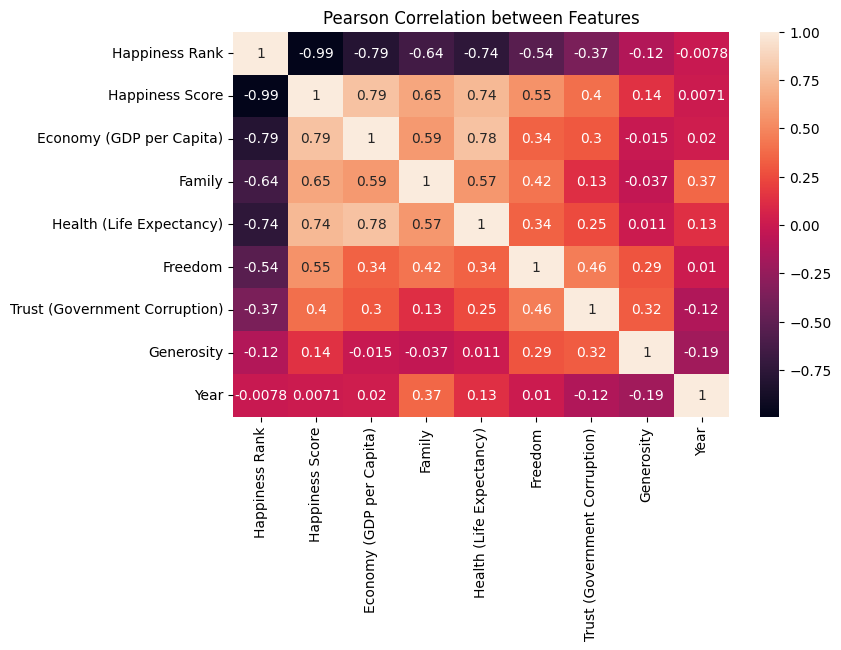

In [ ]:
# Pearson correlation between all features.
# The most significant part of this graph is the row of "Happiness Score"
# This row shows numerical correlation between happiness score and the features
# of the dataset.


# concat all datasets
df_2015_2019 = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

# visualize correlation between happiness score and remaining features using heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_2015_2019.corr(numeric_only=True), annot=True)
plt.title('Pearson Correlation between Features')
plt.show()

# Explanation of Models

1.    Linear Regression:
    Linear regression is a type of statistical analysis used to predict the relationship between two variables. It assumes a linear relationship between the target variable and the input variables/features.



2.    Random Forest Regression:
    Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It creates a set of decision trees on randomly selected data samples and features, then averages their predictions to obtain the final prediction. Random Forests can capture complex relationships between features and the target variable.

3.    Gradient Boosting Regression:
    Gradient Boosting is another ensemble learning technique that combines multiple weak predictive models, usually decision trees, to create a strong predictive model. It works by iteratively adding better models that minimize the error of the previous models. Gradient Boosting Regression can handle non-linear relationships and is robust against outliers. However it is prone to noise as it will then focus on the noisy data.

# Model 1: Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split



# Separate the features (X) from the target variable (y)
# X_train will be our training data
# Y_train will be our training data's labels
# This data will be used to fit our models
X = all_data.drop(['Happiness Score', 'Happiness Rank'], axis=1)
print(X.columns)
y = all_data['Happiness Score']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X
y_train = y

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')


In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict the Happiness Scores for 2019
y_2019_predicted = model.predict(X_2019)

# Add the predicted scores to the DataFrame
df_2019['Happiness Score Linear Regression'] = y_2019_predicted

# Model 2: Random Forest

In [ ]:
# This will use Random Forest Model instead of Linear Regression model
random_forest_model = RandomForestRegressor()

# Train the model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# df_2019_features = pd.read_csv('2019.csv')  # Replace '2019.csv' with the actual file name or DataFrame

# # Remove the 'Happiness Score' column from the features
# X_2019 = df_2019_features.drop(['Happiness Score'], axis=1)

# Predict the Happiness Scores for 2019
# Usese the random forest model
y_2019_predicted = random_forest_model.predict(X_2019)

# Add the predicted scores to the DataFrame
df_2019['Happiness Score Random Forest'] = y_2019_predicted


# Model 3: Gradient Boosting

In [ ]:
# Uses the Gradient boosting regressor model
gradient_boosting_model = GradientBoostingRegressor()

# Train the model
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
# df_2019_features = pd.read_csv('2019.csv')  # Replace '2019.csv' with the actual file name or DataFrame

# # Remove the 'Happiness Score' column from the features
# X_2019 = df_2019_features.drop(['Happiness Score'], axis=1)

# Predict the Happiness Scores for 2019
# predicts using the gradient boosting model
y_2019_predicted = gradient_boosting_model.predict(X_2019)

# Add the predicted scores to the DataFrame
df_2019['Happiness Score Gradient Boosting'] = y_2019_predicted


In [ ]:
df_2019['Happiness Score Actual'] = Y_2019_actual
df_2019.to_csv('2019_predictions.csv', index=False)

# Analysis

In [ ]:
# comparison of original rankings

df_extract = df_2019[['Country', 'Happiness Rank', 'Happiness Score', 'Happiness Score Linear Regression', 'Happiness Score Random Forest', 'Happiness Score Gradient Boosting']]
print(df_2019.columns)
df_extract = df_extract.rename(columns={
    'Happiness Rank': 'Actual Rank',
    'Happiness Score': 'Actual Score',
    'Happiness Score Linear Regression': 'Linear Regression Score',
    'Happiness Score Random Forest': 'Random Forest Score', 
    'Happiness Score Gradient Boosting': 'Gradient Boosting Score'
})

# for each prediction score, sort in descending order and assign rank. then give that rank to each country by adding a column next to the predicion score

df_extract['Linear Regression Rank'] = df_extract['Linear Regression Score'].rank(ascending=False).astype(int)
df_extract['Random Forest Rank'] = df_extract['Random Forest Score'].rank(ascending=False).astype(int)
df_extract['Gradient Boosting Rank'] = df_extract['Gradient Boosting Score'].rank(ascending=False).astype(int)

df_extract = df_extract.reindex(columns=['Country', 'Actual Score', 'Actual Rank', 'Linear Regression Score', 'Linear Regression Rank', 
                            'Random Forest Score', 'Random Forest Rank', 'Gradient Boosting Score', 'Gradient Boosting Rank'])

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year',
       'Happiness Score Linear Regression', 'Happiness Score Random Forest',
       'Happiness Score Gradient Boosting', 'Happiness Score Actual'],
      dtype='object')


In [ ]:
# "Invent your own formula to calculate happiness score using features of your choice"
# "Invent your own formula to calculate happiness score using features of your choice"
#Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Happiness Score Linear Regression,Happiness Score Random Forest,Happiness Score Gradient Boosting,Happiness Score Actual

df_formula = df_2019[[
    'Country',
    'Happiness Rank',
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
]]

df_extract['Invented Formula Score'] = df_formula['Economy (GDP per Capita)'] * 0.41
+ df_formula['Family'] * 0.72
+ df_formula['Health (Life Expectancy)'] * 0.88
+ df_formula['Freedom'] * 0.8
+ df_formula['Trust (Government Corruption)'] * 0.4


# save as file
df_extract.to_csv('2019_predictions_NEW.csv', index=False)

# Accuracy Statistics

In [ ]:
def get_truepositive(y, yhat):
    yOne = (y==1).astype(int)
    yHatOne = (yhat==1).astype(int)
    finalArr = ((yOne+yHatOne)==2).astype(int)
    truepositive = np.sum(finalArr)
    return truepositive

def get_precision(y, yhat):
    truepositive = get_truepositive(y,yhat)
    retrieved = np.sum((yhat==1).astype(int))
    return truepositive/retrieved

def get_recall(y, yhat):
    truepositive = get_truepositive(y,yhat)
    relevant = np.sum((y==1).astype(int))
    return truepositive/relevant

def get_misclass(y,yhat):
    return np.sum((np.not_equal(y, yhat)).astype(int))/len(y)

def get_f1(y,yhat):
    #fill me in
    recall = get_recall(y, yhat)
    precision = get_precision(y, yhat)
    return 2*precision*recall/(precision+recall)
#

In [ ]:
# This will extract the values for 2019 for each model
# Then this will create the Root mean square error for each
# The lower the error score, the better the model
#Therefore with linear regression having the least RMSE, it is the best model
# followed by random forest and finally gradient boosting


data_names = ['Happiness Score Linear Regression', 'Happiness Score Random Forest', 'Happiness Score Gradient Boosting']
names = ['Linear', 'Random', 'Gradient']

print("Model Performance")
for i in range(len(names)):
  # Calculate the root mean squared error (RMSE) of the predictions
  y_pred = df_2019[data_names[i]]
  mse = mean_squared_error(Y_2019_actual, y_pred)
  rmse = mse ** 0.5
  print(data_names[i])
  print("RMSE: ", rmse)
  print()

Model Performance
Happiness Score Linear Regression
RMSE:  0.5343487824113792

Happiness Score Random Forest
RMSE:  0.6313578906244278

Happiness Score Gradient Boosting
RMSE:  0.6582149937009756



**Without year feature**


Model Performance
Happiness Score Linear Regression
RMSE:  0.5496921986362775

Happiness Score Random Forest
RMSE:  0.6530194230999915

Happiness Score Gradient Boosting
RMSE:  0.6829646653357179

**With year feature**


Model Performance
Happiness Score Linear Regression
RMSE:  0.5496921986362775

Happiness Score Random Forest
RMSE:  0.6530194230999915

Happiness Score Gradient Boosting
RMSE:  0.6829646653357179